In [1]:
import sys
import re
import numpy as np
import pandas as pd
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
import gget

In [2]:
fpath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/scPC96o_3/2024-02-01-scPC96o_3_run2/fastq_pass/barcode01/PAS93920_pass_barcode01_4b64fd13_79b31b3b_12.fastq.gz"

fastq = pysam.FastxFile(fpath)
cutter = "CATG"

res = []

for read in fastq:
    n_frg = read.sequence.count(cutter)
    seq_len = len(read.sequence)

    row = {
        'n_frg' : n_frg,
        'seq_len' : seq_len,
    }
    res.append(row)

res = pd.DataFrame(res)
res.head()

,n_frg,seq_len
0,0,548
1,0,736
2,0,665
3,0,527
4,0,825


In [3]:
res['n_frg'].value_counts()

n_frg
0     3672
1      285
2       30
3        5
4        2
20       1
17       1
6        1
12       1
7        1
5        1
Name: count, dtype: int64

In [4]:
res['n_frg'].value_counts(normalize=True)

n_frg
0     0.91800
1     0.07125
2     0.00750
3     0.00125
4     0.00050
20    0.00025
17    0.00025
6     0.00025
12    0.00025
7     0.00025
5     0.00025
Name: proportion, dtype: float64

<AxesSubplot: xlabel='n_frg', ylabel='seq_len'>

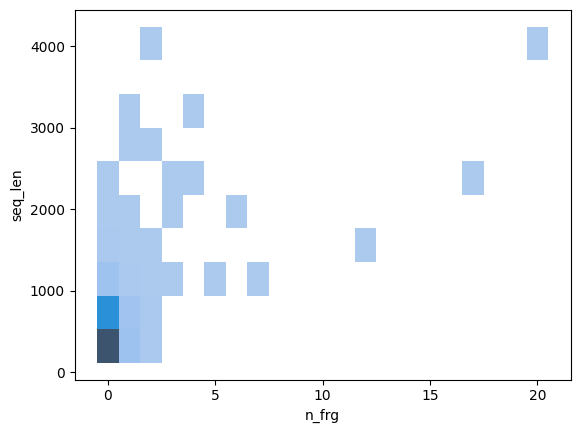

In [5]:
sns.histplot(data=res, 
             x='n_frg',
             y='seq_len',
             bins=(4, 10),
             stat='percent',
             discrete=(True, False),
             )

In [6]:
stop = 4
count = -1

fpath = f"/scratch/indikar_root/indikar1/cstansbu/scpc_test/fastq/b01.raw.fastq"
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    n_frg = read.sequence.count(cutter)
    seq_len = len(read.sequence)
    count += 1
    if count == stop:
        break

    print()
    print(f"{n_frg=} {seq_len=}")
    print(read.sequence)
    edf = gget.blast(read.sequence)
    edf['read_name'] = read.name
    res.append(edf)


res = pd.concat(res)
res.head()

Tue Feb 27 11:26:44 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 11:26:44 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=0 seq_len=532
GTGTTATGTTACGTGCTTCGTTCAGTTACGTATTGCTGGTGCTGAAGAAAGTTGTTGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGCTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGGGTGCTAAAAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGTGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGTAGAGCGACAGGCT


Tue Feb 27 11:26:45 2024 INFO BLAST initiated with search ID XW3A5Y1T016. Estimated time to completion: 30 seconds.
Tue Feb 27 11:27:17 2024 INFO Retrieving results...
Tue Feb 27 11:27:17 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 11:27:17 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=0 seq_len=518
GTTTTTGTATTCTACTCGTTCAGTTACGTATTGCTGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGTGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAAAAGTTGTGCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGTAAATTGGAATTGTTATAAAGAATTATGGTGTGTTCTTGCTAACCTTTCTGTTGGTGCTGATATTGCGGTGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGCGGTGCTGAAGAAAGCTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATTGTGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGAAGATAGAGCGACAGGCAAGTAGGTTAACACAAAGACACCTACACTTTCTTCAGCACCAGCAATACGTTGGT


Tue Feb 27 11:27:18 2024 INFO BLAST initiated with search ID XW3B6RME013. Estimated time to completion: 30 seconds.
Tue Feb 27 11:27:48 2024 INFO BLASTING...
Tue Feb 27 11:28:50 2024 INFO Retrieving results...
Tue Feb 27 11:28:50 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 11:28:50 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=1 seq_len=577
ATGTTTTGCATGTATTCGTTCAGTTACGTGTATGCTGGTGCTAGTGTTTTTGCGTGGGAATGAATCCTTTTTAACCTTTCTGTTGGTGCTCTGATGTTGGTGCTGAAGAAAGTTGTCAGGTGTCTTTGTGTTAACCTTTCTGTTGGTGCTGATATGCAGGTGCTGAAGAAAGTTGTCGTATTATGTTAACCTTTTATCTTGATGCTGATATTGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTTAACCTTTCCTGTTGGTGCTGATGTTGCGGTGCTGAAGAAAGTTGTTCGGTGTCTTTGTGTTAACTTTTCTGTTCTGGTGCTGATCTGTCGTGTGTTGAAGAAAGTTGTCGGTGTCTTTGTGTTAACCTTTTTATCTTGATATAATATGCGGTGCTGAAGAAAGTTGTCGGTGTCTTTGTGTAACTCTTGCTGTTGGTGCTGATCTGCCATATGAAGAACCTGTGTCGTGTCTTTGTGTTAACTTTTCTGTTTTTCCATTATAAAGATCGAGCGACAGGCAAGTAGGTTAACACAAAGAGCACCAACAACTTTCTTCACGCCACAATTGGTTA


Tue Feb 27 11:28:51 2024 INFO BLAST initiated with search ID XW3E3XDP016. Estimated time to completion: 30 seconds.
Tue Feb 27 11:29:21 2024 INFO BLASTING...
Tue Feb 27 11:30:23 2024 INFO BLASTING...
Tue Feb 27 11:31:24 2024 INFO BLASTING...
Tue Feb 27 11:32:25 2024 INFO BLASTING...
Tue Feb 27 11:33:27 2024 INFO BLASTING...
Tue Feb 27 11:34:30 2024 INFO Retrieving results...
Tue Feb 27 11:34:30 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 11:34:30 2024 INFO BLAST will use program 'blastn' with database 'nt'.



n_frg=0 seq_len=492
TTGCATCTACTGGTTCAGTTACGTGTATTGCTTGTCTTTGTGTTAACCTACTTGCCTGTCGCTCTATCTTCAAGAACGCCAAAGGTTAACACAAAGGCACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCGCCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCACCGACAACTTTCTTCAGCACCGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCAGCAATATCAGCACCAACAGAAAGGTTAACACAAAGACACCGACAACTTTCTTCAGCACCAACAACTTTCTTTTCAGCACCACAATATCAGCACCAACAGAAAGGTTAACAGGATTCATTCCCACGGTAACACCAGCACCAGCAATACGTAGTG


Tue Feb 27 11:34:30 2024 INFO BLAST initiated with search ID XW3SPF1B016. Estimated time to completion: 30 seconds.
Tue Feb 27 11:35:02 2024 INFO Retrieving results...


,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession,read_name
0,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,145.0,924.0,93%,2.000000e-29,97.62%,4379,MN135767.1,d2e216fe-c419-430d-9db0-fe09922fdc83
1,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,132.0,1186.0,93%,1.000000e-25,95.24%,4114,MN135768.1,d2e216fe-c419-430d-9db0-fe09922fdc83
2,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,99.0,555.0,65%,1.000000e-15,88.89%,4151,MN135764.1,d2e216fe-c419-430d-9db0-fe09922fdc83
3,[Candida] auris isolate B12043 chromosome 5,[Candida] auris,NaN,498019,76.8,429.0,44%,6.000000e-09,100.00%,1029387,CP050670.1,d2e216fe-c419-430d-9db0-fe09922fdc83
4,Lactiplantibacillus sp. AMBF275 isolate AMBF27...,Lactiplantibacillus carotarum,NaN,2993456,75.0,433.0,44%,2.000000e-08,100.00%,26145,OX443577.1,d2e216fe-c419-430d-9db0-fe09922fdc83


In [13]:
thresh = 30

fpath = f"/scratch/indikar_root/indikar1/cstansbu/scpc_test/fastq/b01.raw.fastq"
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    n_frg = read.sequence.count(cutter)
    seq_len = len(read.sequence)
    quals = read.get_quality_array()

    if np.mean(quals) > thresh:
        print(f"{n_frg=} {seq_len=}")

        edf = gget.blast(read.sequence)
        print(edf.head())
        break

Tue Feb 27 11:42:49 2024 INFO Sequence recognized as nucleotide sequence.
Tue Feb 27 11:42:49 2024 INFO BLAST will use program 'blastn' with database 'nt'.


n_frg=0 seq_len=532


Tue Feb 27 11:42:49 2024 INFO BLAST initiated with search ID XW489X5M016. Estimated time to completion: 30 seconds.
Tue Feb 27 11:43:20 2024 INFO BLASTING...
Tue Feb 27 11:44:21 2024 INFO BLASTING...
Tue Feb 27 11:45:22 2024 INFO BLASTING...
Tue Feb 27 11:46:24 2024 INFO Retrieving results...


                                         Description  \
0  Uncultured Parasutterella sp. clone MinION_con...   
1  Uncultured Parasutterella sp. clone MinION_con...   
2  Uncultured Parasutterella sp. clone MinION_con...   
3        [Candida] auris isolate B12043 chromosome 5   
4  Lactiplantibacillus sp. AMBF275 isolate AMBF27...   

                 Scientific Name Common Name    Taxid  Max Score  Total Score  \
0  uncultured Parasutterella sp.         NaN  1263098      145.0        924.0   
1  uncultured Parasutterella sp.         NaN  1263098      132.0       1186.0   
2  uncultured Parasutterella sp.         NaN  1263098       99.0        555.0   
3                [Candida] auris         NaN   498019       76.8        429.0   
4  Lactiplantibacillus carotarum         NaN  2993456       75.0        433.0   

  Query Cover       E value Per. Ident  Acc. Len   Accession  
0         93%  2.000000e-29     97.62%      4379  MN135767.1  
1         93%  1.000000e-25     95.24%      4114  

In [7]:
res['Scientific Name'].value_counts()

Scientific Name
Trichoderma virens FT-333                          28
uncultured Parasutterella sp.                      22
[Candida] auris                                    20
Lactiplantibacillus carotarum                      12
Enterobacter hormaechei                             8
uncultured Turicimonas sp.                          6
Severe acute respiratory syndrome coronavirus 2     5
Luteimonas granuli                                  4
Streptomyces koelreuteriae                          4
Hebeloma theobrominum                               2
Heterocephalus glaber                               2
Staphylococcus pseudintermedius                     2
Nephridiophagidae sp.                               2
Staphylococcus phage S-CoN_Ph14                     1
Mucor sp.                                           1
Name: count, dtype: int64

In [8]:
res['Description'].values[0]

'Uncultured Parasutterella sp. clone MinION_consensus13 16S ribosomal RNA gene, partial sequence; 16S-23S ribosomal RNA intergenic spacer, complete sequence; and 23S ribosomal RNA gene, partial sequence'

In [9]:
res.head()

,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession,read_name
0,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,145.0,924.0,93%,2.000000e-29,97.62%,4379,MN135767.1,d2e216fe-c419-430d-9db0-fe09922fdc83
1,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,132.0,1186.0,93%,1.000000e-25,95.24%,4114,MN135768.1,d2e216fe-c419-430d-9db0-fe09922fdc83
2,Uncultured Parasutterella sp. clone MinION_con...,uncultured Parasutterella sp.,NaN,1263098,99.0,555.0,65%,1.000000e-15,88.89%,4151,MN135764.1,d2e216fe-c419-430d-9db0-fe09922fdc83
3,[Candida] auris isolate B12043 chromosome 5,[Candida] auris,NaN,498019,76.8,429.0,44%,6.000000e-09,100.00%,1029387,CP050670.1,d2e216fe-c419-430d-9db0-fe09922fdc83
4,Lactiplantibacillus sp. AMBF275 isolate AMBF27...,Lactiplantibacillus carotarum,NaN,2993456,75.0,433.0,44%,2.000000e-08,100.00%,26145,OX443577.1,d2e216fe-c419-430d-9db0-fe09922fdc83


In [10]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
stop = 45
count = -1
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    seq = read.sequence
    quals = read.get_quality_array()
    
    print(seq)
    print()
    print(quals)

    break

In [ ]:
np.mean(quals)

In [ ]:
fpath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/scPC96o_2/Run2/fastq_pass/barcode01/PAS87012_pass_barcode01_a3fcacfb_67c73f7f_0.fastq.gz"

stop = 45
count = -1
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    seq = read.sequence
    quals = read.get_quality_array()
    res.append(np.mean(quals))


sns.histplot(res)

In [ ]:
fpath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/data/fastq/p2/scPC96o_3/2024-02-01-scPC96o_3_run2/fastq_pass/barcode01/PAS93920_pass_barcode01_4b64fd13_79b31b3b_12.fastq.gz"

stop = 45
count = -1
fastq = pysam.FastxFile(fpath)

res = []
for read in fastq:
    seq = read.sequence
    quals = read.get_quality_array()
    res.append(np.mean(quals))

sns.histplot(res)